In [2]:
import pandas as pd


file_path = 'cleaned_alldata_version2.csv'
data = pd.read_csv(file_path)


data.head()


,Unnamed: 0,Date_of_observation,Species_name,Lat,Long,State_name,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open,Year,Week,Species_id
0,1,2020-01-01,Indian Almond-Terminalia catappa,12.15386,75.22397,Kerala,2.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2020.0,0,1085.0
1,2,2020-01-01,Indian Almond-Terminalia catappa,12.15386,75.22397,Kerala,2.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2020.0,0,1085.0
2,3,2020-01-01,Fish-tail Palm-Caryota urens,12.14060,75.22145,Kerala,0.0,2.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2020.0,0,1019.0
3,4,2020-01-01,Mast Tree-Monoon longifolium,12.14060,75.22145,Kerala,1.0,2.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2020.0,0,1065.0
4,5,2020-01-01,Indian Almond-Terminalia catappa,12.14060,75.22145,Kerala,0.0,1.0,2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2020.0,0,1085.0


In [3]:
# Kerala only
kerala_data = data[data['State_name'] == 'Kerala']


kerala_data.info(), kerala_data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 478793 entries, 0 to 571833
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           478793 non-null  int64  
 1   Date_of_observation  180120 non-null  object 
 2   Species_name         478793 non-null  object 
 3   Lat                  478793 non-null  float64
 4   Long                 478793 non-null  float64
 5   State_name           478793 non-null  object 
 6   Leaves_fresh         478789 non-null  float64
 7   Leaves_mature        478782 non-null  float64
 8   Leaves_old           302080 non-null  float64
 9   Flowers_bud          478783 non-null  float64
 10  Flowers_open         478764 non-null  float64
 11  Flowers_male         301661 non-null  float64
 12  Flowers_Female       301661 non-null  float64
 13  Fruits_unripe        478786 non-null  float64
 14  Fruits_ripe          478780 non-null  float64
 15  Fruits_open          3

(None,
           Unnamed: 0            Lat           Long   Leaves_fresh  \
 count  478793.000000  478793.000000  478793.000000  478789.000000   
 mean   291114.616912       9.992013      76.375666       1.083782   
 std    163193.023201       2.275736       2.248706       0.672541   
 min         1.000000       7.307340       6.445500      -2.000000   
 25%    147197.000000       8.627950      76.177890       1.000000   
 50%    290655.000000       9.397710      76.578530       1.000000   
 75%    425182.000000      10.760890      76.874970       2.000000   
 max    592593.000000      82.065700     100.000000       2.000000   
 
        Leaves_mature     Leaves_old    Flowers_bud   Flowers_open  \
 count  478782.000000  302080.000000  478783.000000  478764.000000   
 mean        1.766138       0.741976       0.481598       0.284723   
 std         0.529563       0.637660       0.945658       1.045138   
 min        -2.000000      -2.000000      -2.000000      -2.000000   
 25%       

In [4]:
# Aggregating data by location (Lat, Long) to capture seasonal behavior trends
# Using the mean to summarize each seasonal attribute over time for each unique location

seasonal_columns = ['Leaves_fresh', 'Leaves_mature', 'Leaves_old', 'Flowers_bud',
                    'Flowers_open', 'Flowers_male', 'Flowers_Female', 'Fruits_unripe',
                    'Fruits_ripe', 'Fruits_open']

# Aggregating by Lat and Long
kerala_aggregated = kerala_data.groupby(['Lat', 'Long'])[seasonal_columns].mean().reset_index()

# Display the aggregated data to review the summary statistics
kerala_aggregated.head()


,Lat,Long,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open
0,7.30734,92.73899,0.377778,1.922222,0.32,0.400000,0.322222,-2.0,-2.0,0.411111,0.100000,-2.0
1,8.10834,77.46473,1.609756,1.743902,NaN,1.414634,1.365854,NaN,NaN,1.085366,1.024390,NaN
2,8.13372,76.64490,1.315789,1.947368,NaN,1.578947,1.421053,NaN,NaN,1.105263,1.157895,NaN
3,8.13372,76.86713,1.571429,2.000000,NaN,1.142857,1.571429,NaN,NaN,0.642857,0.571429,NaN
4,8.30128,77.08707,1.000000,2.000000,1.00,0.000000,0.000000,-2.0,-2.0,0.000000,0.000000,0.0


In [5]:

kerala_aggregated_filled = kerala_aggregated.fillna(-2)


from sklearn.preprocessing import StandardScaler

# Separate Lat and Long for clustering
lat_long = kerala_aggregated_filled[['Lat', 'Long']].values
seasonal_data = kerala_aggregated_filled.drop(['Lat', 'Long'], axis=1)

# Scale the seasonal data
scaler = StandardScaler()
seasonal_data_scaled = scaler.fit_transform(seasonal_data)


from sklearn.cluster import DBSCAN

# Using DBSCAN with default settings for now; parameters may need tuning
dbscan = DBSCAN(eps=1.5, min_samples=10)
clusters = dbscan.fit_predict(seasonal_data_scaled)

# Add cluster labels back to the original data
kerala_aggregated_filled['Cluster'] = clusters

# Display the resulting clusters to understand groupings
kerala_aggregated_filled['Cluster'].value_counts(), kerala_aggregated_filled.head()


(Cluster
  0    19333
 -1     1168
  8       49
  2       34
  7       22
  3       20
  4       20
  6       20
  5       12
  9       12
  1       10
 Name: count, dtype: int64,
        Lat      Long  Leaves_fresh  Leaves_mature  Leaves_old  Flowers_bud  \
 0  7.30734  92.73899      0.377778       1.922222        0.32     0.400000   
 1  8.10834  77.46473      1.609756       1.743902       -2.00     1.414634   
 2  8.13372  76.64490      1.315789       1.947368       -2.00     1.578947   
 3  8.13372  76.86713      1.571429       2.000000       -2.00     1.142857   
 4  8.30128  77.08707      1.000000       2.000000        1.00     0.000000   
 
    Flowers_open  Flowers_male  Flowers_Female  Fruits_unripe  Fruits_ripe  \
 0      0.322222          -2.0            -2.0       0.411111     0.100000   
 1      1.365854          -2.0            -2.0       1.085366     1.024390   
 2      1.421053          -2.0            -2.0       1.105263     1.157895   
 3      1.571429          -2.0  

In [6]:
import geopandas as gpd
from shapely.geometry import Point

# Convert Lat/Long data to geometric points and plot on a basemap of India (Kerala region focus)
# Loading a base map with Indian states boundaries for reference
# Kerala-specific state boundary can be used to better contextualize the data

# Create geometry column using Lat and Long for Kerala points
geometry = [Point(xy) for xy in zip(kerala_aggregated_filled['Long'], kerala_aggregated_filled['Lat'])]
kerala_gdf = gpd.GeoDataFrame(kerala_aggregated_filled, geometry=geometry)

# Load India states shapefile for reference and filter Kerala (using any available map layer if present)
try:
    india_states = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    kerala_boundary = india_states[(india_states['name'] == "India") & (india_states['geometry'].type == "Polygon")]

    # Plot Kerala with clusters overlay
    fig, ax = plt.subplots(figsize=(12, 12))
    kerala_boundary.plot(ax=ax, color="lightgrey", edgecolor="black")
    kerala_gdf.plot(column="Cluster", ax=ax, cmap="tab20", markersize=10, legend=True, alpha=0.6)

    plt.title("Geographic Clustering of Seasonal Behavior in Kerala with Basemap")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

except Exception as e:
    str(e)


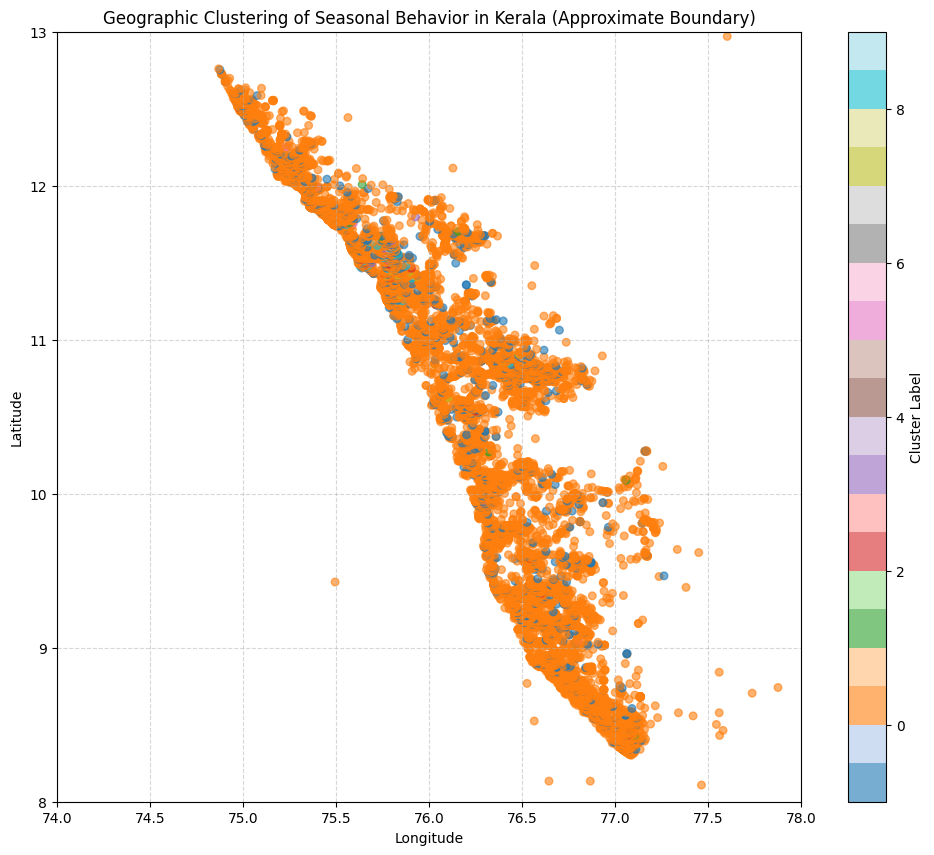

In [8]:
# Redrawing the Kerala clustering with an estimated outline using latitude and longitude boundaries for visualization purposes
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))

scatter = plt.scatter(kerala_aggregated_filled['Long'], kerala_aggregated_filled['Lat'],
                      c=kerala_aggregated_filled['Cluster'], cmap='tab20', s=30, alpha=0.6)

# Adding Kerala boundary approximations
plt.xlim(74, 78)
plt.ylim(8, 13)

plt.colorbar(scatter, label="Cluster Label")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Clustering of Seasonal Behavior in Kerala (Approximate Boundary)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


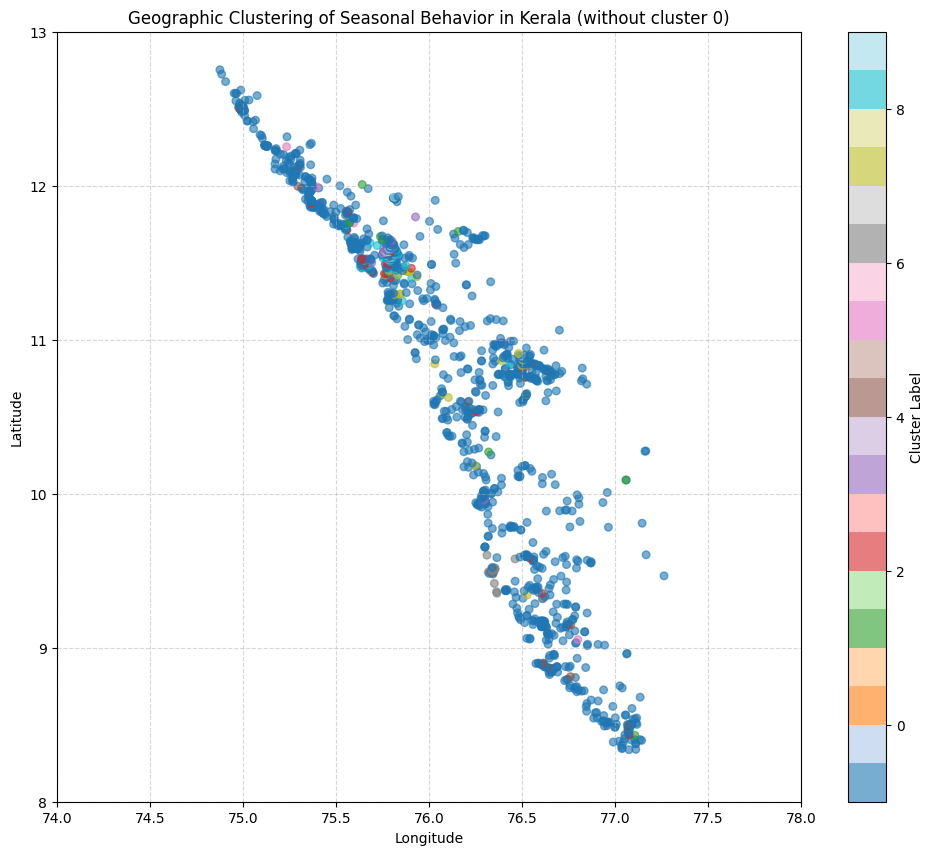

In [9]:

kerala_clusters_no_main = kerala_aggregated_filled[kerala_aggregated_filled['Cluster'] != 0]

# Plot the remaining clusters without Cluster 0
plt.figure(figsize=(12, 10))
scatter = plt.scatter(kerala_clusters_no_main['Long'], kerala_clusters_no_main['Lat'],
                      c=kerala_clusters_no_main['Cluster'], cmap='tab20', s=30, alpha=0.6)
plt.colorbar(scatter, label="Cluster Label")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Clustering of Seasonal Behavior in Kerala (without cluster 0)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(74, 78)
plt.ylim(8, 13)
plt.show()


In [10]:
# Checking for unique years in the data for year-specific clustering analysis
years_available = data['Year'].dropna().unique()
years_available.sort()
years_available


array([2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023.])

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Define seasonal columns to use for clustering
seasonal_columns = ['Leaves_fresh', 'Leaves_mature', 'Leaves_old', 'Flowers_bud',
                    'Flowers_open', 'Flowers_male', 'Flowers_Female', 'Fruits_unripe',
                    'Fruits_ripe', 'Fruits_open']

# Dictionary to store clustering results for each year
yearly_clusters = {}


for year in years_available:
    # Filter data for Kerala and for the specific year
    year_data = data[(data['State_name'] == 'Kerala') & (data['Year'] == year)]


    year_aggregated = year_data.groupby(['Lat', 'Long'])[seasonal_columns].mean().reset_index()

    # Handle missing values by marking them as absence (-2) as before
    year_aggregated = year_aggregated.fillna(-2)

    # Standardize seasonal data (excluding Lat and Long for spatial reference)
    seasonal_data = year_aggregated.drop(['Lat', 'Long'], axis=1)
    scaler = StandardScaler()
    seasonal_data_scaled = scaler.fit_transform(seasonal_data)

    # Clustering using DBSCAN for the specific year
    dbscan = DBSCAN(eps=1.5, min_samples=10)  # Parameters may be adjusted based on clustering needs
    clusters = dbscan.fit_predict(seasonal_data_scaled)


    year_aggregated['Cluster'] = clusters
    yearly_clusters[year] = year_aggregated


yearly_clusters[2015].head()


,Lat,Long,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open,Cluster
0,8.10834,77.46473,1.285714,2.000000,-2.0,1.285714,1.285714,-2.0,-2.0,1.142857,1.000000,-2.0,0
1,8.33425,77.04602,1.250000,1.750000,-2.0,0.750000,0.500000,-2.0,-2.0,0.500000,1.250000,-2.0,0
2,8.35749,77.04559,2.000000,2.000000,-2.0,0.000000,0.000000,-2.0,-2.0,0.000000,0.000000,-2.0,0
3,8.35842,77.05079,1.333333,2.000000,-2.0,1.000000,0.666667,-2.0,-2.0,1.000000,0.333333,-2.0,0
4,8.35943,77.06589,1.138996,1.988417,-2.0,0.223938,0.216216,-2.0,-2.0,0.277992,0.092664,-2.0,0


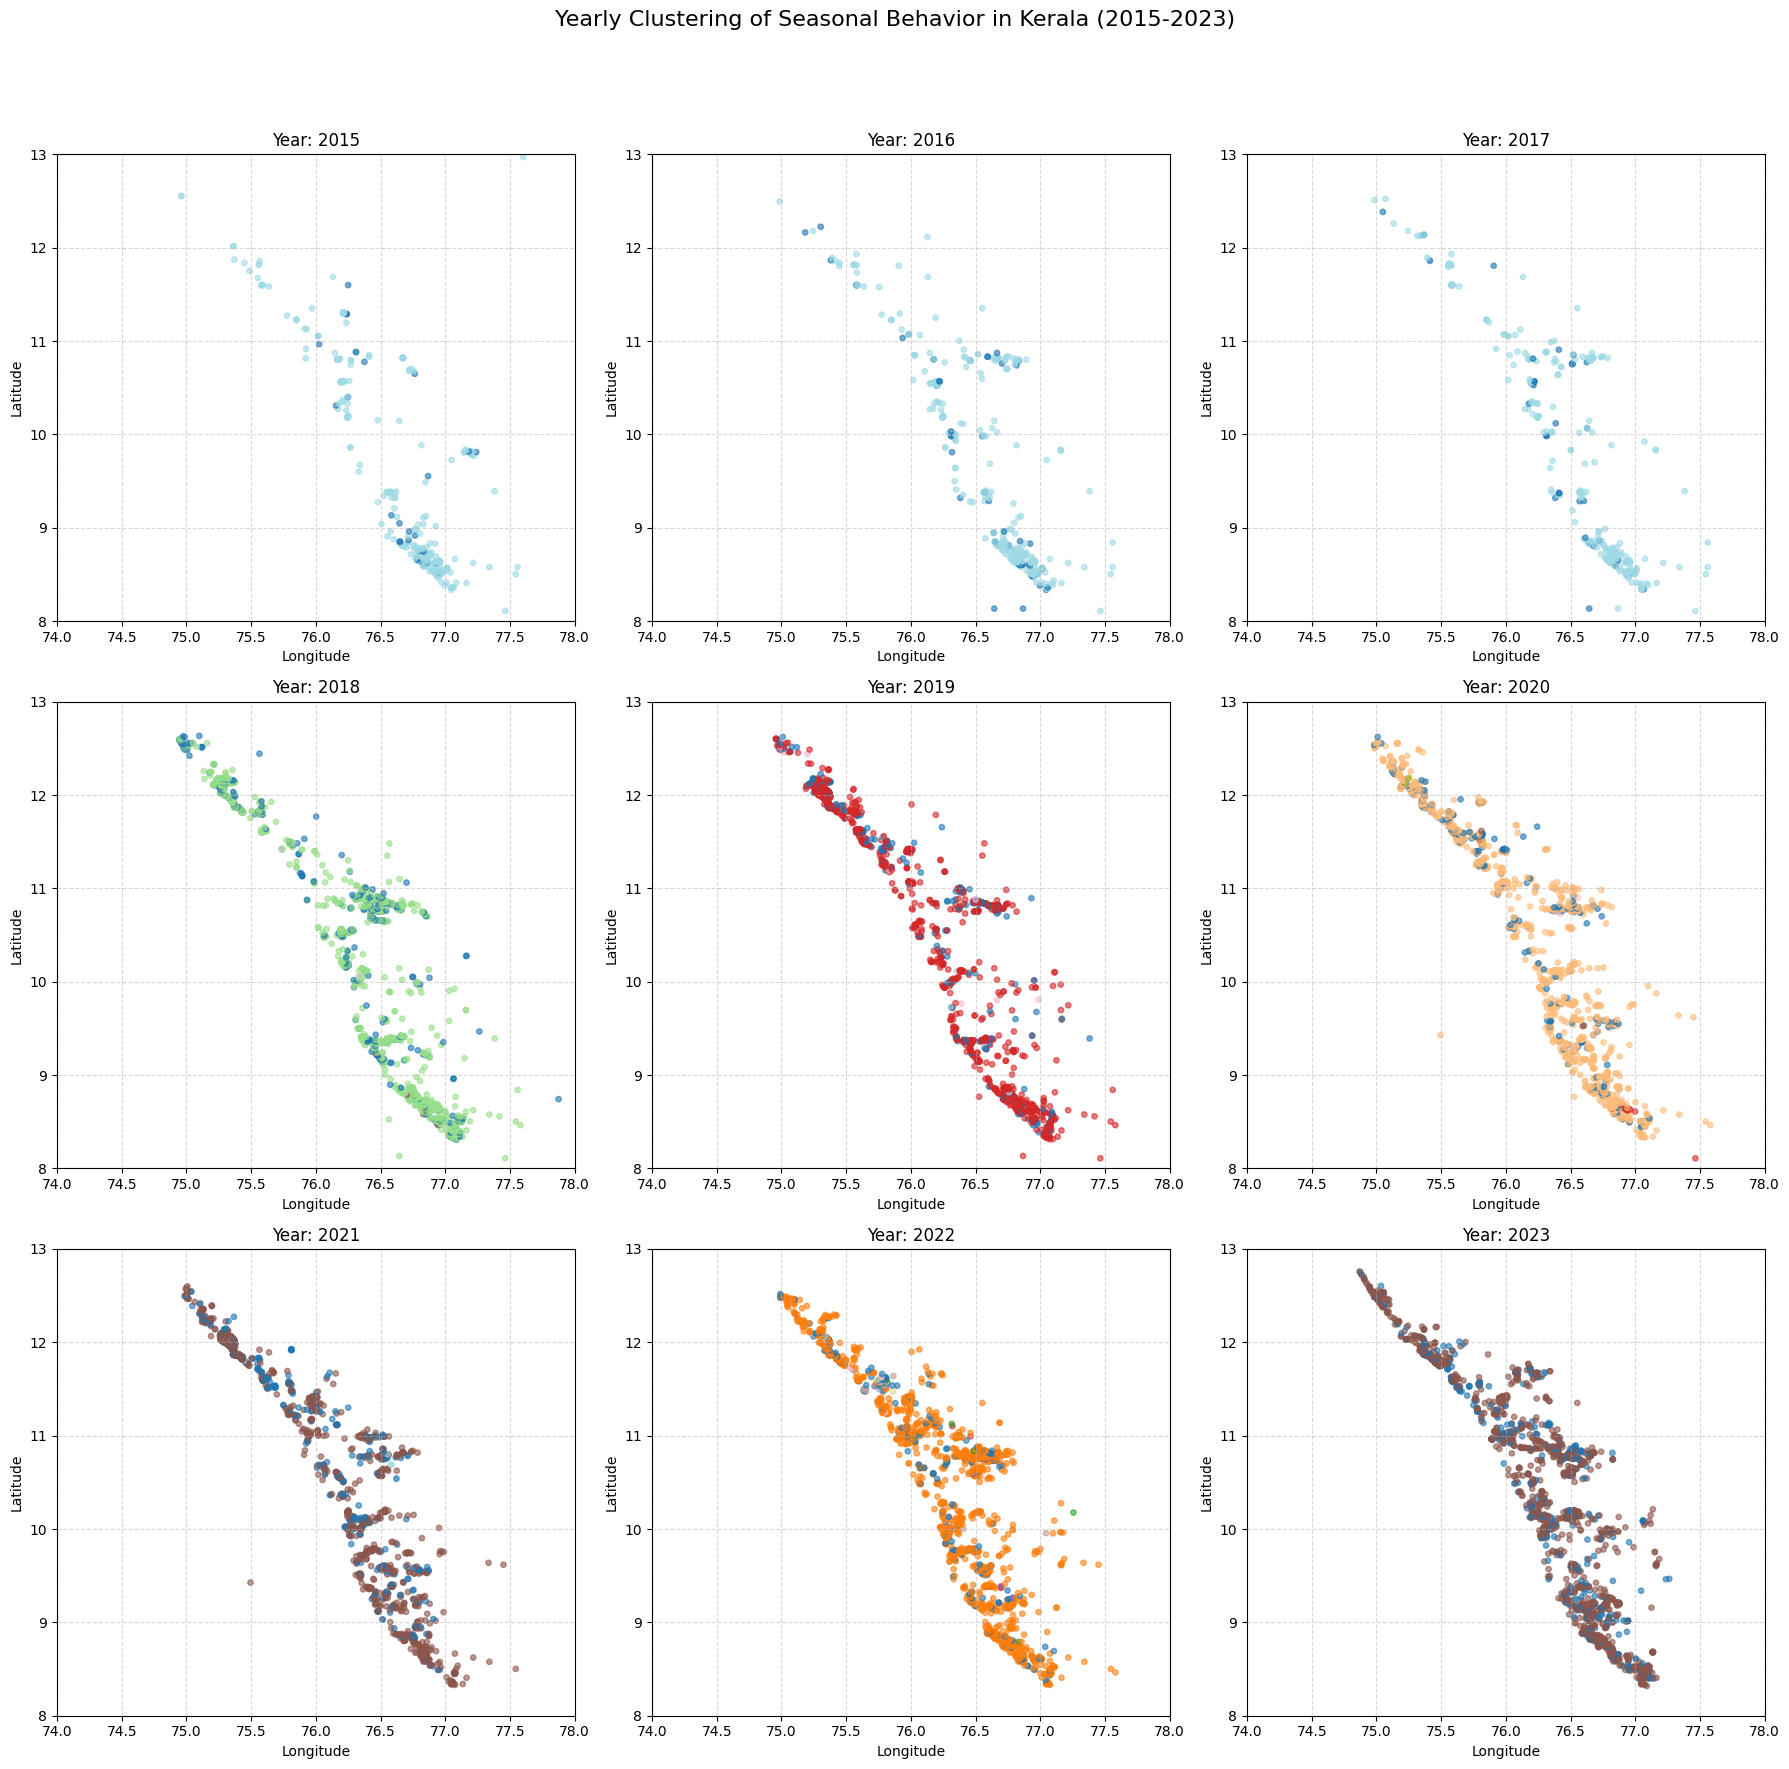

In [16]:


fig, axs = plt.subplots(3, 3, figsize=(18, 18))  # 3x3 grid for each year from 2015 to 2023
fig.suptitle("Yearly Clustering of Seasonal Behavior in Kerala (2015-2023)", fontsize=16)

# Plotting each year in a grid
for i, year in enumerate(years_available):
    row, col = divmod(i, 3)
    ax = axs[row, col]
    year_data = yearly_clusters[year]

    # Scatter plot for each year's clusters
    scatter = ax.scatter(year_data['Long'], year_data['Lat'], c=year_data['Cluster'], cmap='tab20', s=15, alpha=0.6)
    ax.set_title(f"Year: {int(year)}")
    ax.set_xlim(74, 78)
    ax.set_ylim(8, 13)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")




plt.tight_layout(rect=[0, 0, 1, 0.94])  # Adjust layout for title space
plt.show()
